# Steel Plate Faults - Neural Networks

In [1]:
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from keras.models import Sequential
from keras.layers import Dense
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler



# Dataset Loading

In [ ]:
data = pd.read_csv('faults.csv')
data.drop('TypeOfSteel_A400', axis = 1)
features = data.values
labels = features[:,27:34]
features = features[:,0:27]

# MinMax Scaling

In [2]:
print(np.array(labels).shape)
minmax = MinMaxScaler(feature_range=(0,1))
features = pd.DataFrame(minmax.fit_transform(features))
features_train, features_test, labels_train, labels_test = train_test_split(features, labels,test_size=0.25,random_state=42)

(1941, 7)


# Building and Training Neural Network

In [3]:
model = Sequential()
model.add(Dense(32,input_dim=27,activation='relu'))
model.add(Dense(16,activation='relu'))
model.add(Dense(16,activation='sigmoid'))
model.add(Dense(7,activation='softmax'))

from keras.optimizers import SGD
opt = SGD(lr=0.01)

model.compile(loss='categorical_crossentropy', optimizer=opt, metrics=['accuracy'])

In [4]:
history = model.fit(np.array(features_train),np.array(labels_train), validation_data=(np.array(features_test),np.array(labels_test)), epochs=200, batch_size=10)

Epoch 1/200
146/146 [==============================] - 1s 3ms/step - loss: 1.7807 - accuracy: 0.3430 - val_loss: 1.6879 - val_accuracy: 0.3580
Epoch 2/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6855 - accuracy: 0.3430 - val_loss: 1.6460 - val_accuracy: 0.3580
Epoch 3/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6624 - accuracy: 0.3430 - val_loss: 1.6286 - val_accuracy: 0.3580
Epoch 4/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6495 - accuracy: 0.3430 - val_loss: 1.6125 - val_accuracy: 0.3580
Epoch 5/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6367 - accuracy: 0.3430 - val_loss: 1.5978 - val_accuracy: 0.3580
Epoch 6/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6212 - accuracy: 0.3430 - val_loss: 1.5770 - val_accuracy: 0.3580
Epoch 7/200
146/146 [==============================] - 0s 1ms/step - loss: 1.6005 - accuracy: 0.3430 - val_loss: 1.5535 - val_accuracy: 0.3580

# Visualizing Training History

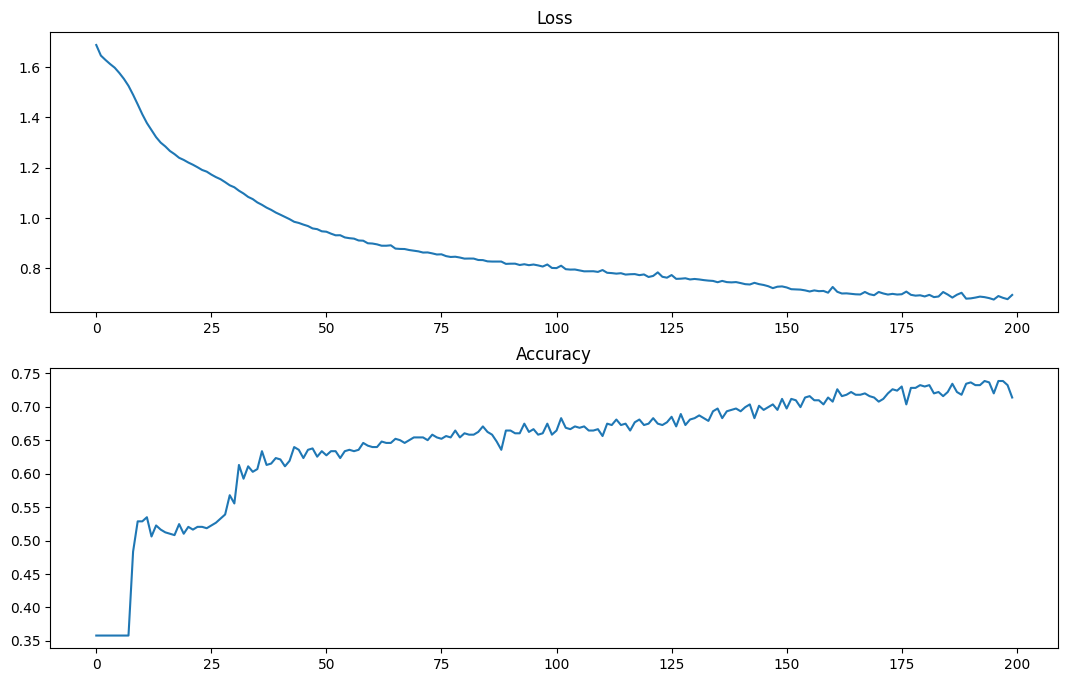

In [6]:
plt.figure(figsize=[13,8])
plt.subplot(211)
plt.title('Loss')
plt.plot(history.history['val_loss'])
plt.subplot(212)
plt.title('Accuracy')
plt.plot(history.history['val_accuracy'])
plt.show()